In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce


from bold_dementia.cogpred import make_training_data, make_all_data, extract_net, MockAtlas
from bold_dementia.utils.configuration import get_config

from neuroginius.atlas import Atlas
from bold_dementia.cogpred import plot_matrix, MatrixResult

config = get_config()
atlas = Atlas.from_name("schaefer200")


matrices, metadata = make_all_data(
    config["connectivity_matrices"],
    atlas.name,
    k=3,
    suffix="corr"
)
sns.reset_defaults()

In [3]:
defaults = np.stack([extract_net(mat, atlas, "Default")[0] for mat in matrices])
_, regions = extract_net(matrices[0], atlas, "Default")

<Axes: >

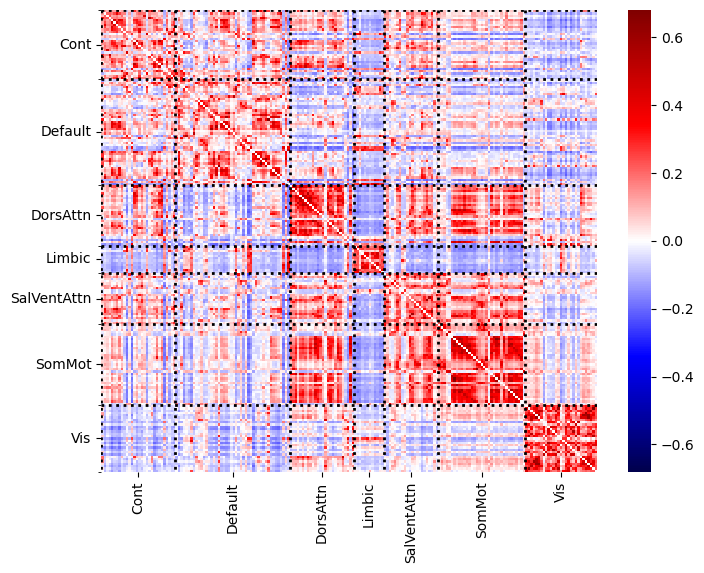

In [8]:
plot_matrix(matrices.mean(axis=0), atlas, cmap="seismic")

In [5]:
comp_lst = []

matrix_res = MatrixResult(matrices, atlas)
for i, sorted_mat in enumerate(matrix_res.sorted_matrices):
    gen = matrix_res._gen_macro_values(sorted_mat, lambda x: (x.mean(),))
    comparisons = pd.DataFrame(gen, columns=["node_a", "node_b", "connectivity"])
    comparisons["sub"] = metadata.loc[i, "sub"]
    comparisons["ses"] = metadata.loc[i, "ses"]
    comp_lst.append(comparisons)


df = pd.concat(comp_lst)

In [11]:
df.to_csv("output/connectivity_export/schaefer-yeo_intra_dmn_gsr-true.csv")